# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Read the csv data into a pandas dataframe and display the first 5 samples

In [11]:
df = pd.read_csv("Real_estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [20]:
df.shape


(414, 8)

### What are the features available in the dataset?

In [21]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [22]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [23]:
X = df.drop(columns=["Y house price of unit area"])
X.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


### Group feature(s) as independent features in y

In [24]:
y = df["Y house price of unit area"]
y


0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (331, 7)
X_test : (83, 7)
y_train: (331,)
y_test : (83,)


### Choose the model (Linear Regression)

In [26]:
from sklearn.linear_model import LinearRegression


### Create an Estimator object

In [27]:
lr = LinearRegression()
lr


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Train the model

In [28]:
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Apply the model

In [29]:
r2 = lr.score(X_test, y_test)
print("r2 Score : ", r2)


r2 Score :  0.6745228670350778


### Display the coefficients

In [30]:
lr.coef_


array([-5.61695287e-03,  5.40743502e+00, -2.67827999e-01, -4.81543315e-03,
        1.08114445e+00,  2.26048799e+02, -3.01254914e+01])

### Find how well the trained model did with testing data

In [31]:
r2 = lr.score(X_test, y_test)
print("r2 Score : ", r2)


r2 Score :  0.6745228670350778


### Plot House Age Vs Price
#### Hint: Use regplot in sns

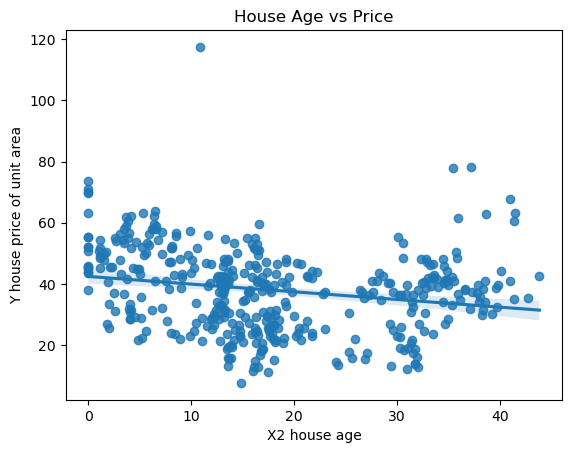

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="X2 house age", y="Y house price of unit area", data=df)
plt.title("House Age vs Price")
plt.show()


### Plot Distance to MRT station Vs Price

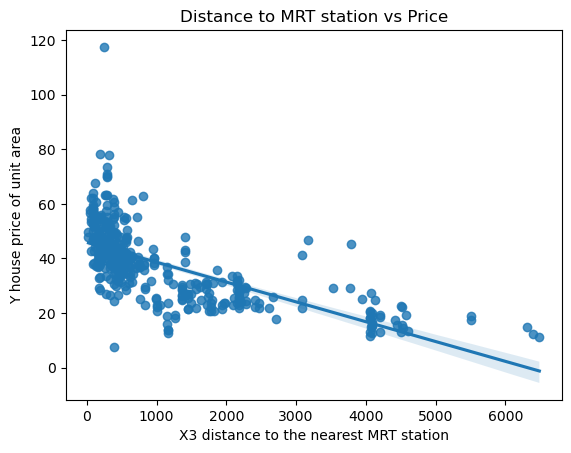

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="X3 distance to the nearest MRT station",
            y="Y house price of unit area",
            data=df)
plt.title("Distance to MRT station vs Price")
plt.show()


### Plot Number of Convienience Stores Vs Price

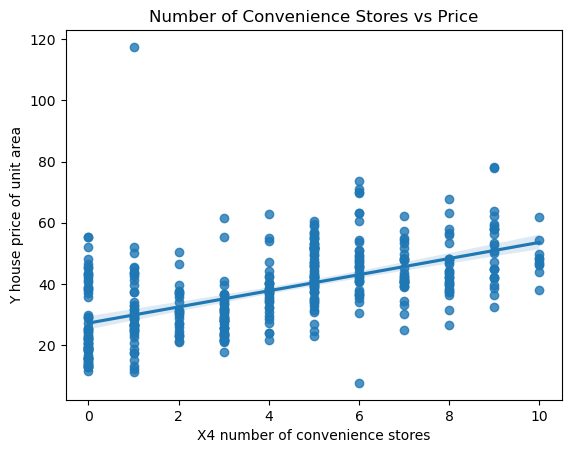

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="X4 number of convenience stores",
            y="Y house price of unit area",
            data=df)
plt.title("Number of Convenience Stores vs Price")
plt.show()
